<a href="https://colab.research.google.com/github/sharjeel-ahmed17/ml_temp/blob/main/Loan_Prediction_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Approval Prediction - Machine Learning Project

## Complete ML Project Analysis

This project analyzes the loan_data dataset to predict loan approval status based on various applicant characteristics.

## Table of Contents
1. [Introduction](#introduction)
2. [Dataset Overview](#dataset-overview)
3. [Exploratory Data Analysis](#eda)
4. [Data Preprocessing](#preprocessing)
5. [Model Building](#model-building)
6. [Model Evaluation](#evaluation)
7. [Insights & Conclusions](#insights-conclusions)
8. [Summary](#summary)

## Introduction <a id='introduction'></a>

This machine learning project aims to predict loan approval status (loan_status) based on various factors related to loan applicants. The dataset contains personal and financial information of loan applicants, allowing us to identify key factors that influence loan approval decisions.

### Objectives:
- Analyze the loan dataset to understand patterns in loan approvals
- Build predictive models to forecast loan approval likelihood
- Identify key factors influencing loan approval decisions
- Evaluate model performance and provide actionable insights

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

## Dataset Overview <a id='dataset-overview'></a>

Let's load the dataset and understand its structure, dimensions, and basic statistics.

In [3]:
# Load the dataset
df = pd.read_csv('loan_data.csv')
print(f"Dataset Shape: {df.shape}")
print(f"\nColumn Names:")
for col in df.columns:
    print(f"- {col}")

print(f"\nDataset Info:")
df.info()

Dataset Shape: (45000, 14)

Column Names:
- person_age
- person_gender
- person_education
- person_income
- person_emp_exp
- person_home_ownership
- loan_amnt
- loan_intent
- loan_int_rate
- loan_percent_income
- cb_person_cred_hist_length
- credit_score
- previous_loan_defaults_on_file
- loan_status

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent         

In [4]:
# Display first few rows
df.head(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


In [5]:
# Basic statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.764178,6.045108,20.00,24.00,26.00,30.00,144.00
person_income,45000.0,80319.053222,80422.498632,8000.00,47204.00,67048.00,95789.25,7200766.00
person_emp_exp,45000.0,5.410333,6.063532,0.00,1.00,4.00,8.00,125.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,5000.00,8000.00,12237.25,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,8.59,11.01,12.99,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,3.00,4.00,8.00,30.00
credit_score,45000.0,632.608756,50.435865,390.00,601.00,640.00,670.00,850.00
loan_status,45000.0,0.222222,0.415744,0.00,0.00,0.00,0.00,1.00


### Target Variable Distribution

Understanding the distribution of our target variable (loan_status) is crucial for model building.

Target Variable Distribution:
loan_status
0    35000
1    10000
Name: count, dtype: int64

Class Imbalance: 35000 negative cases (77.78%) and 10000 positive cases (22.22%)


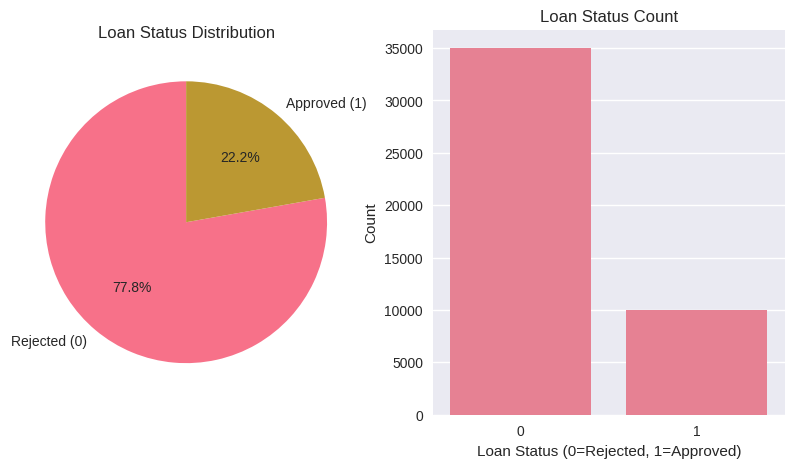

In [6]:
# Check target variable distribution
target_dist = df['loan_status'].value_counts()
print("Target Variable Distribution:")
print(target_dist)
print(f"\nClass Imbalance: {target_dist[0]} negative cases ({target_dist[0]/len(df)*100:.2f}%) and {target_dist[1]} positive cases ({target_dist[1]/len(df)*100:.2f}%)")

# Visualize target distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(target_dist.values, labels=['Rejected (0)', 'Approved (1)'], autopct='%1.1f%%', startangle=90)
plt.title('Loan Status Distribution')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='loan_status')
plt.title('Loan Status Count')
plt.xlabel('Loan Status (0=Rejected, 1=Approved)')
plt.ylabel('Count')
plt.show()

## Exploratory Data Analysis (EDA) <a id='eda'></a>

Let's explore the relationships between different features and the target variable.

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values found in the dataset.")
else:
    print("Missing values per column:")
    print(missing_values[missing_values > 0])

No missing values found in the dataset.


In [8]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

Numerical columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']
Categorical columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']


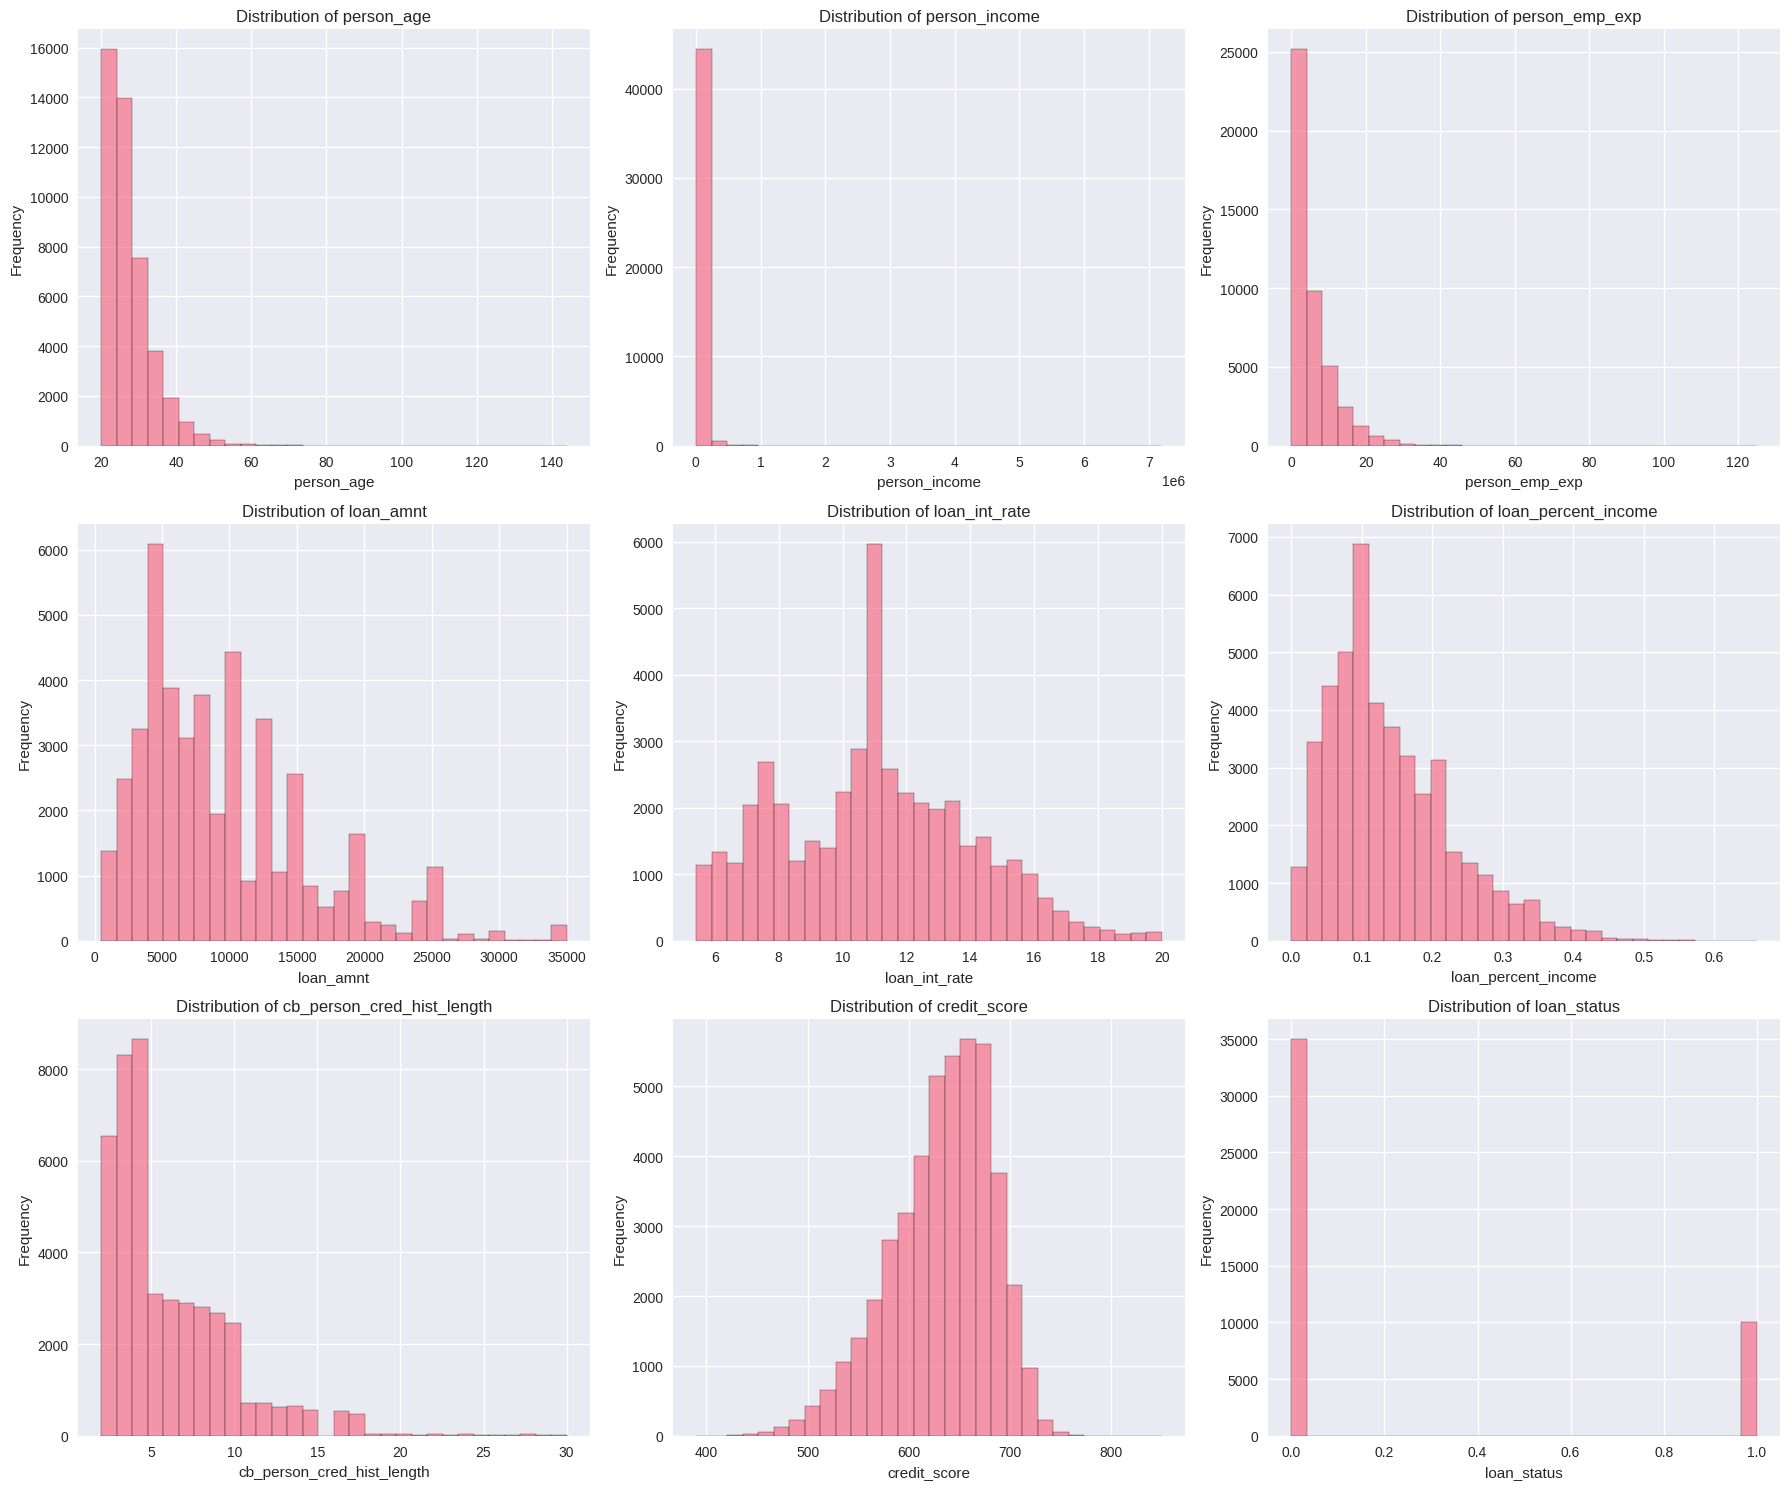

In [9]:
# Distribution of numerical features
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

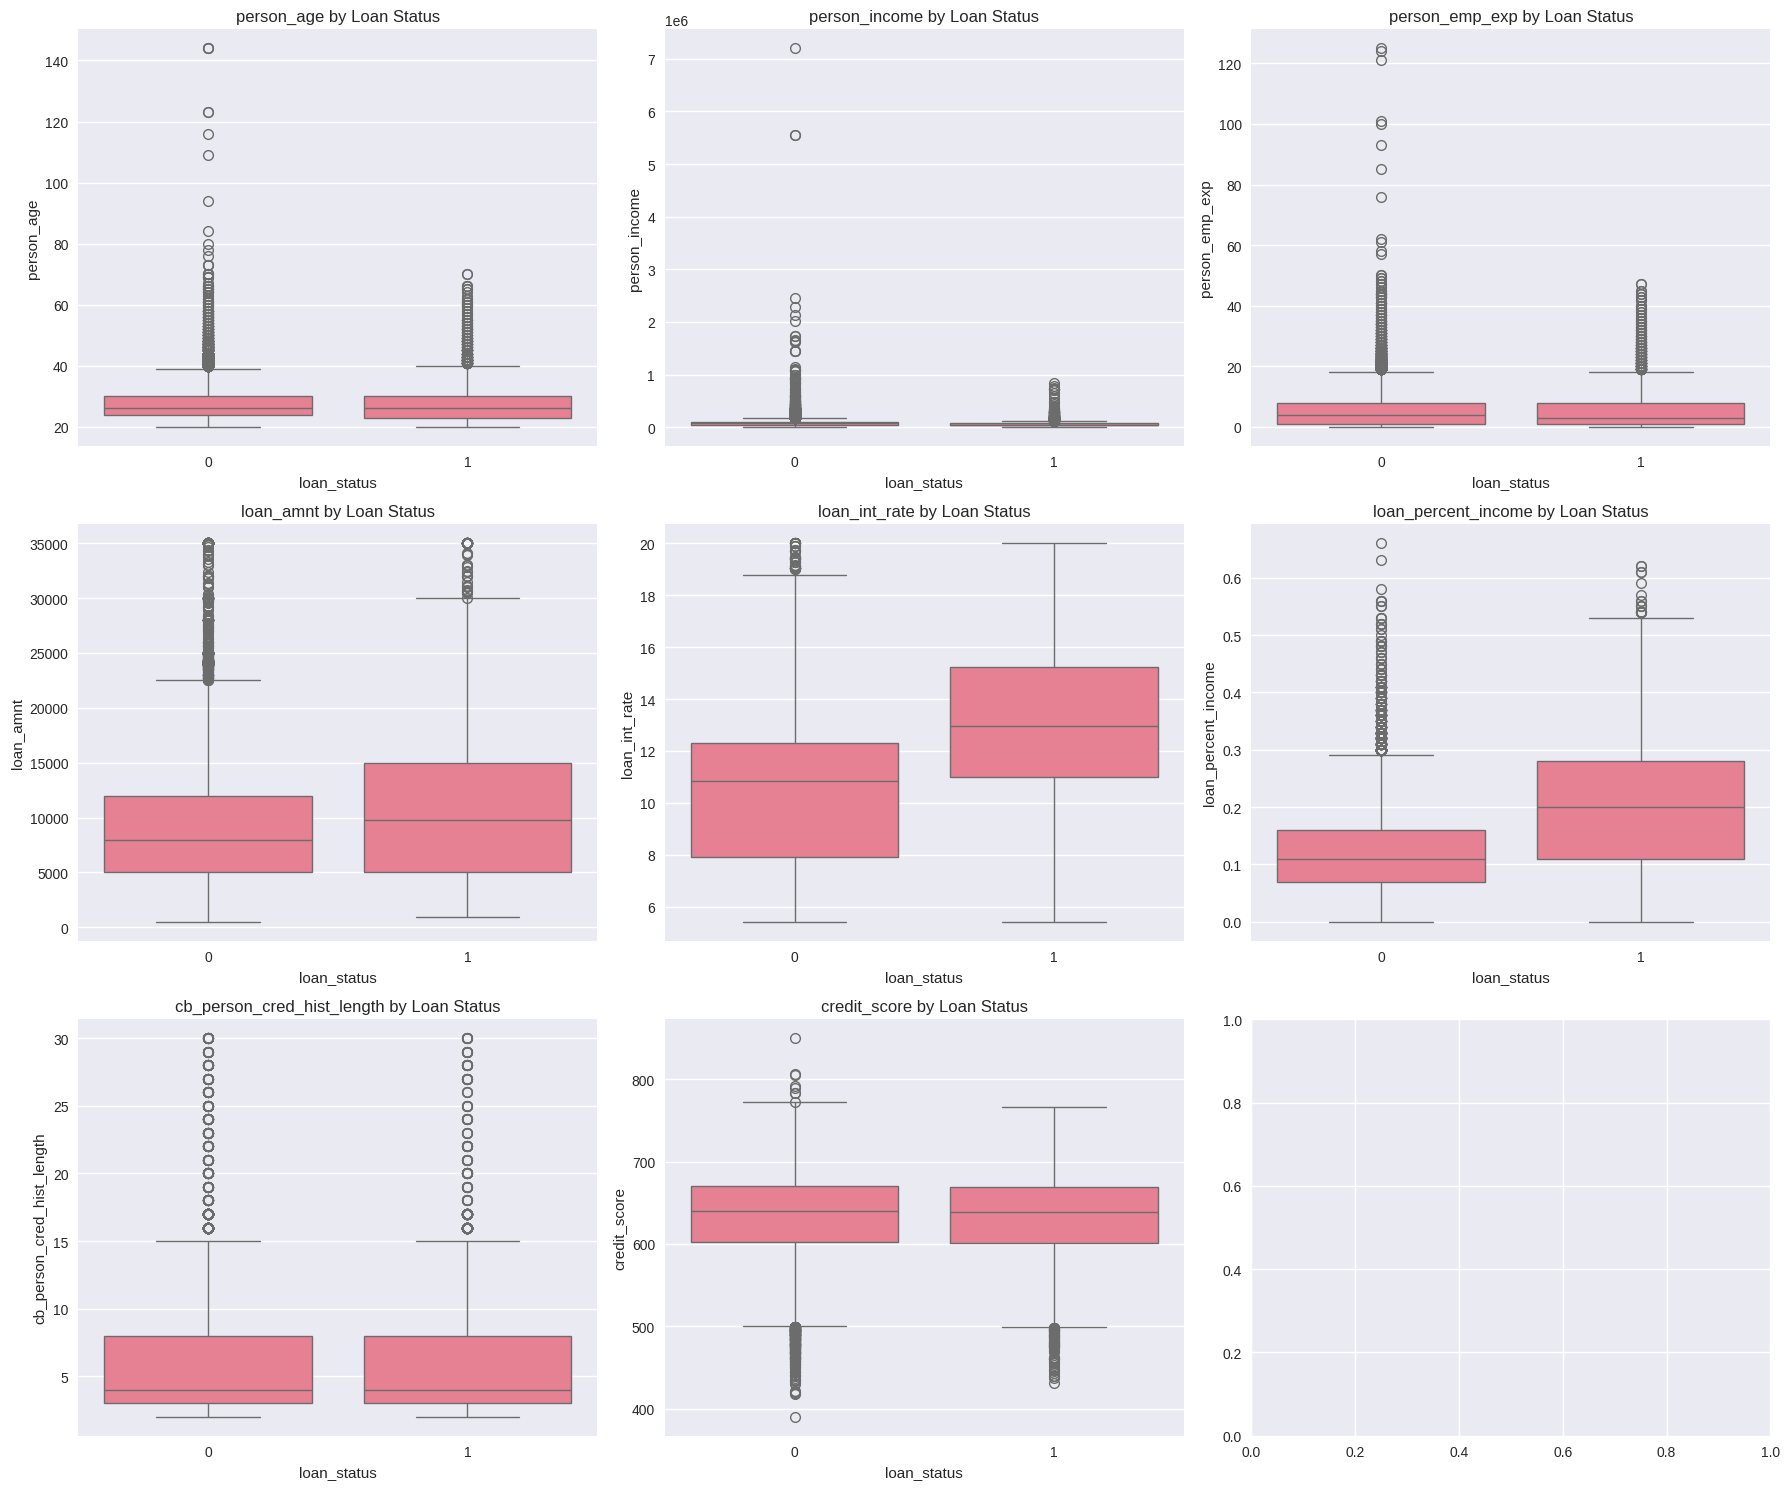

In [10]:
# Box plots for numerical features by loan status
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < len(axes) and col != 'loan_status':
        sns.boxplot(data=df, x='loan_status', y=col, ax=axes[i])
        axes[i].set_title(f'{col} by Loan Status')

# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

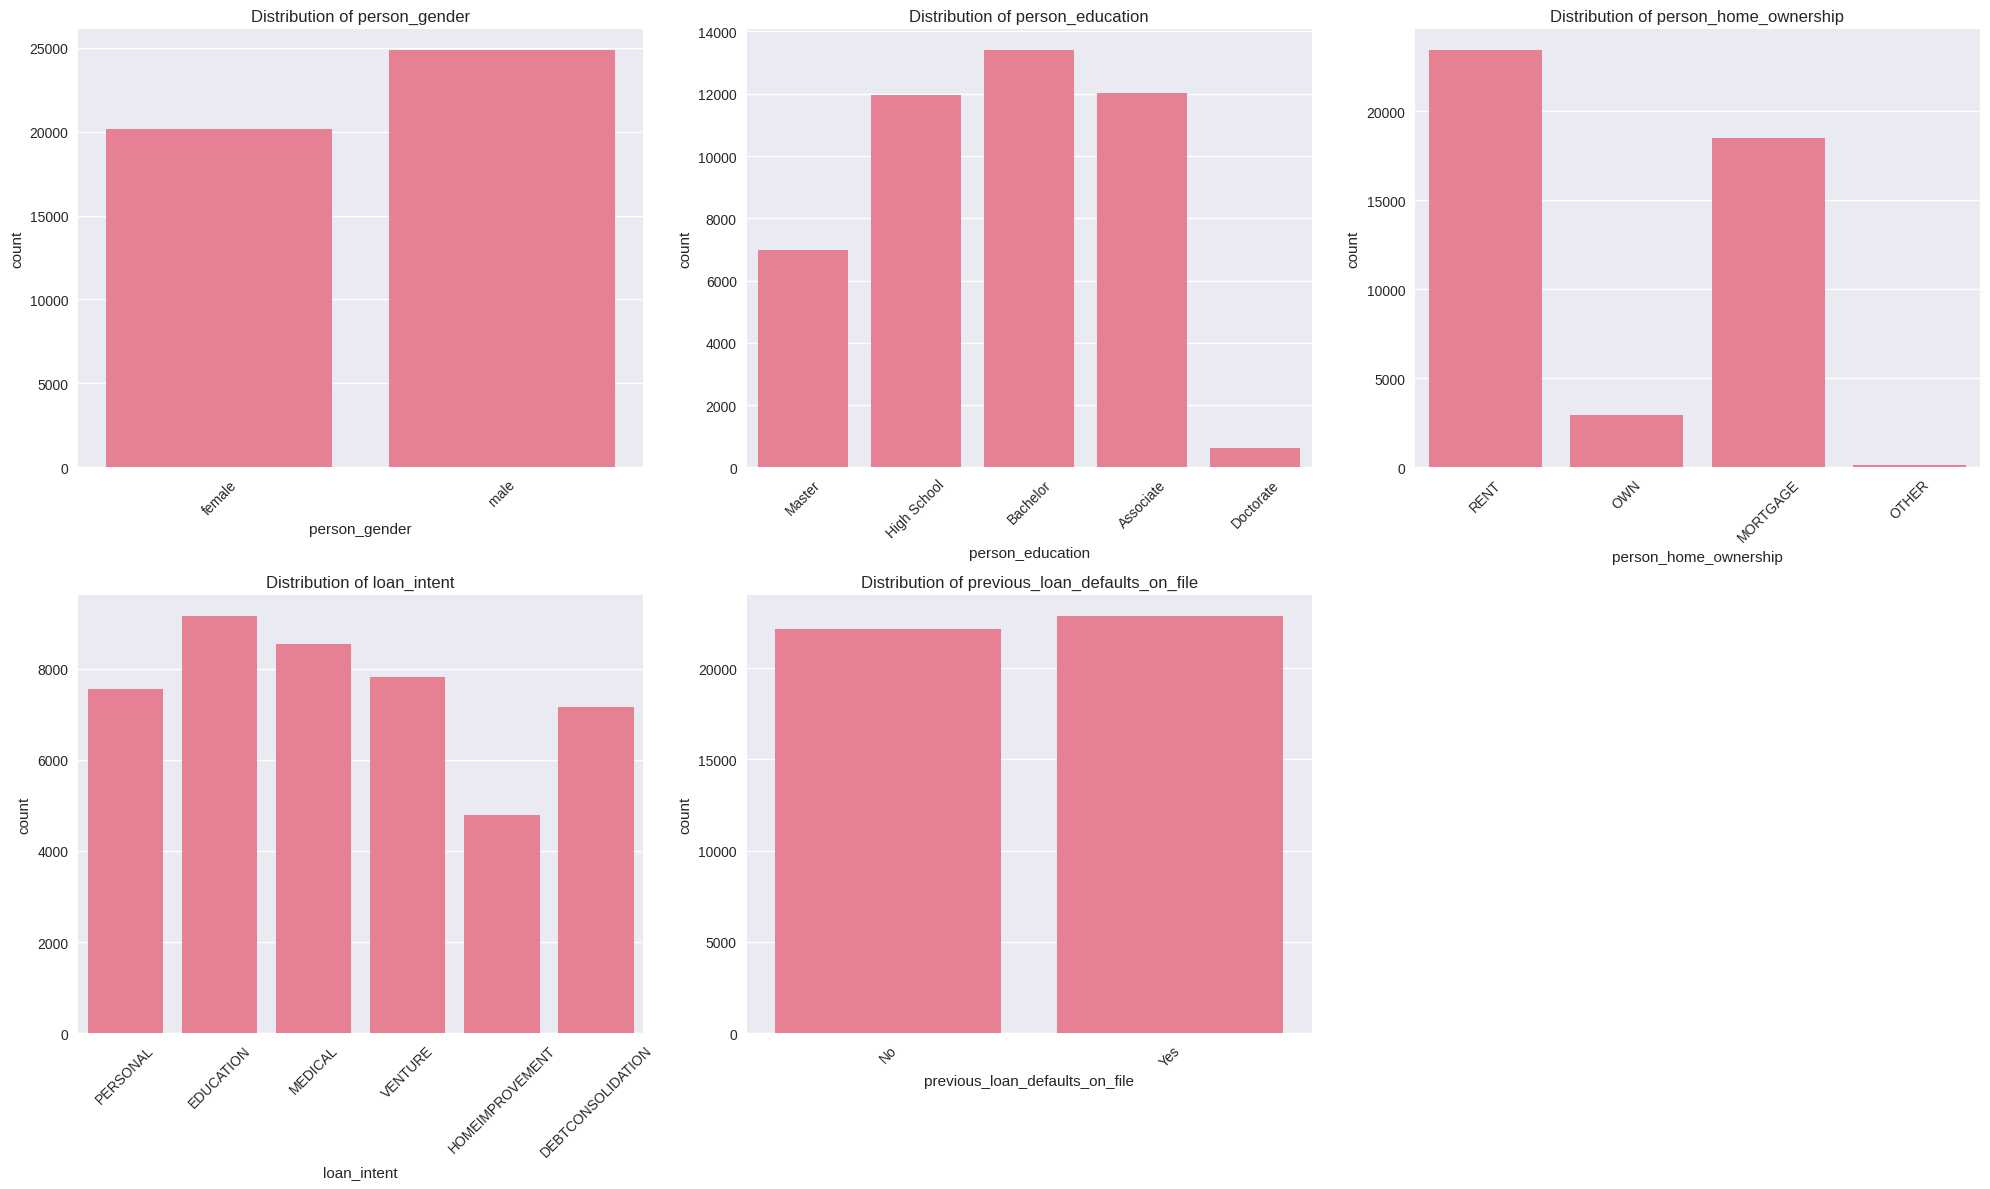

In [11]:
# Distribution of categorical features
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    if i < len(axes):
        # Count plot for categorical features
        sns.countplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

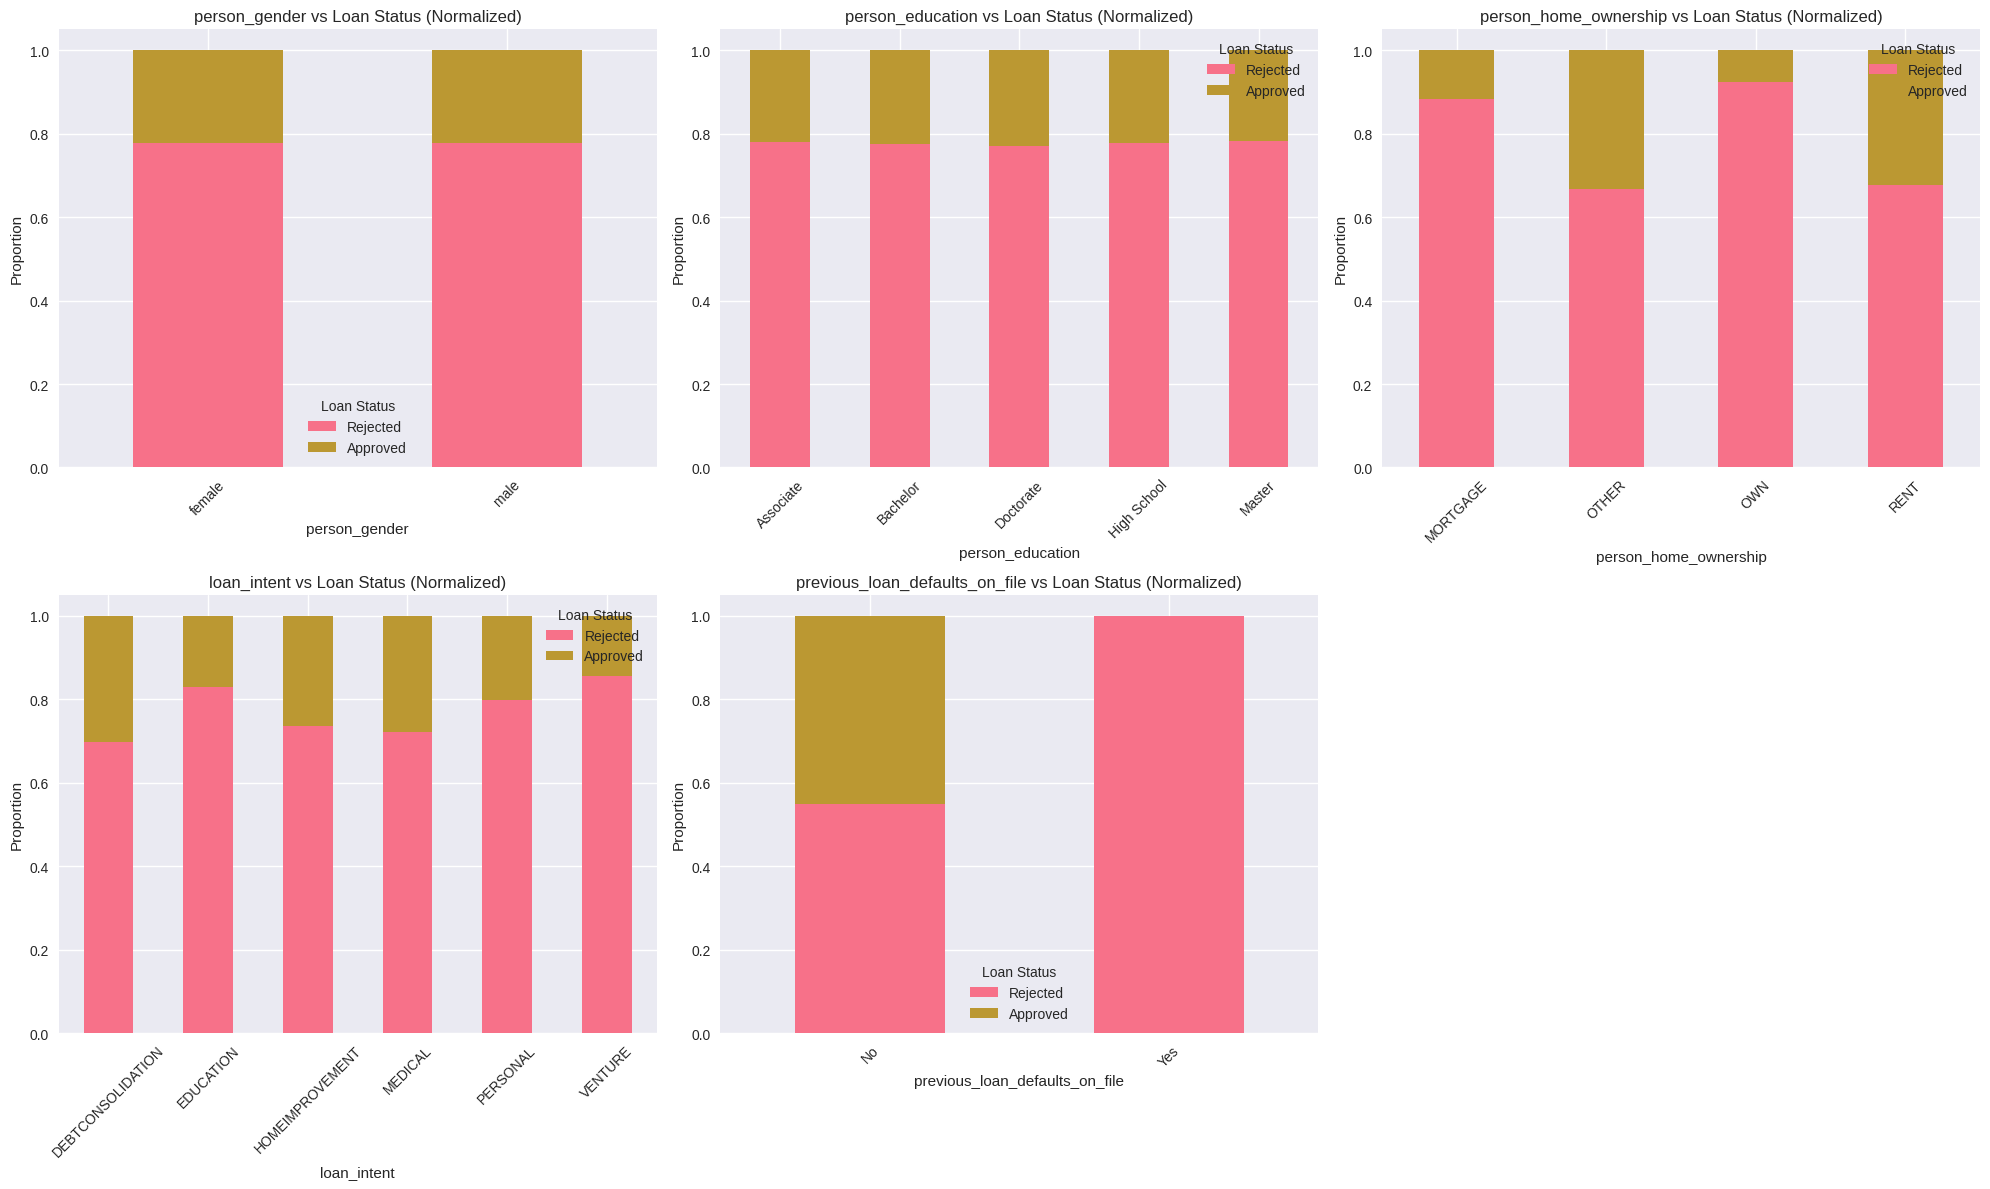

In [12]:
# Categorical features vs loan status
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    if i < len(axes):
        # Stacked bar chart showing loan status by category
        crosstab = pd.crosstab(df[col], df['loan_status'], normalize='index')
        crosstab.plot(kind='bar', stacked=True, ax=axes[i])
        axes[i].set_title(f'{col} vs Loan Status (Normalized)')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Proportion')
        axes[i].legend(title='Loan Status', labels=['Rejected', 'Approved'])
        axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

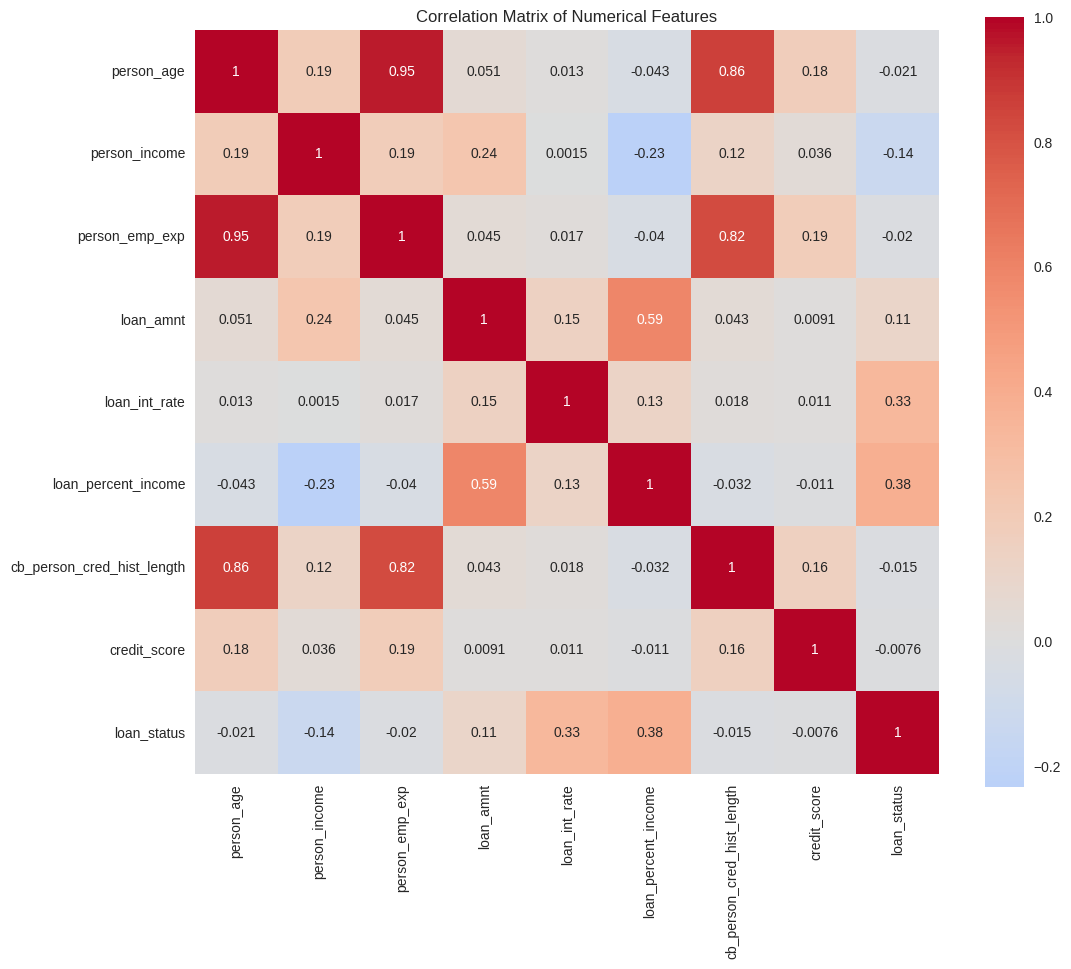

Highly correlated feature pairs (|correlation| > 0.5):
person_age - person_emp_exp: 0.954
person_age - cb_person_cred_hist_length: 0.862
person_emp_exp - cb_person_cred_hist_length: 0.824
loan_amnt - loan_percent_income: 0.593


In [13]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Print highly correlated pairs
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            high_corr_pairs.append((correlation_matrix.columns[i],
                                   correlation_matrix.columns[j],
                                   correlation_matrix.iloc[i, j]))

if high_corr_pairs:
    print("Highly correlated feature pairs (|correlation| > 0.5):")
    for pair in high_corr_pairs:
        print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")
else:
    print("No highly correlated feature pairs found (|correlation| > 0.5)")

## Data Preprocessing <a id='preprocessing'></a>

Prepare the data for machine learning by encoding categorical variables and scaling numerical features.

In [14]:
# Encode categorical variables
le_dict = {}
df_encoded = df.copy()

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    le_dict[col] = le

print("Categorical variables encoded:")
for col in categorical_cols:
    print(f"{col}: {dict(zip(le_dict[col].classes_, le_dict[col].transform(le_dict[col].classes_)))}")

Categorical variables encoded:
person_gender: {'female': np.int64(0), 'male': np.int64(1)}
person_education: {'Associate': np.int64(0), 'Bachelor': np.int64(1), 'Doctorate': np.int64(2), 'High School': np.int64(3), 'Master': np.int64(4)}
person_home_ownership: {'MORTGAGE': np.int64(0), 'OTHER': np.int64(1), 'OWN': np.int64(2), 'RENT': np.int64(3)}
loan_intent: {'DEBTCONSOLIDATION': np.int64(0), 'EDUCATION': np.int64(1), 'HOMEIMPROVEMENT': np.int64(2), 'MEDICAL': np.int64(3), 'PERSONAL': np.int64(4), 'VENTURE': np.int64(5)}
previous_loan_defaults_on_file: {'No': np.int64(0), 'Yes': np.int64(1)}


In [15]:
# Prepare features and target
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature columns: {list(X.columns)}")

Features shape: (45000, 13)
Target shape: (45000,)
Feature columns: ['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file']


In [16]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"Training target distribution: {y_train.value_counts().sort_index()}")
print(f"Test target distribution: {y_test.value_counts().sort_index()}")

Training set size: 36000 samples (80.0%)
Test set size: 9000 samples (20.0%)
Training target distribution: loan_status
0    28000
1     8000
Name: count, dtype: int64
Test target distribution: loan_status
0    7000
1    2000
Name: count, dtype: int64


In [17]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed")

Feature scaling completed


## Model Building <a id='model-building'></a>

Build and train multiple machine learning models to predict loan approval status.

In [19]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"Training {name}...")

    # Use scaled data for Logistic Regression and SVM, original for Random Forest
    if name in ['Logistic Regression', 'SVM']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_proba)

    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'auc_score': auc_score,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

    print(f"{name} - Accuracy: {accuracy:.4f}, AUC: {auc_score:.4f}\n")

Training Logistic Regression...
Logistic Regression - Accuracy: 0.8968, AUC: 0.9514

Training Random Forest...
Random Forest - Accuracy: 0.9277, AUC: 0.9738

Training SVM...
SVM - Accuracy: 0.9089, AUC: 0.9586



Model Comparison:
                 Model  Accuracy  AUC Score
0  Logistic Regression  0.896778   0.951399
1        Random Forest  0.927667   0.973792
2                  SVM  0.908889   0.958584


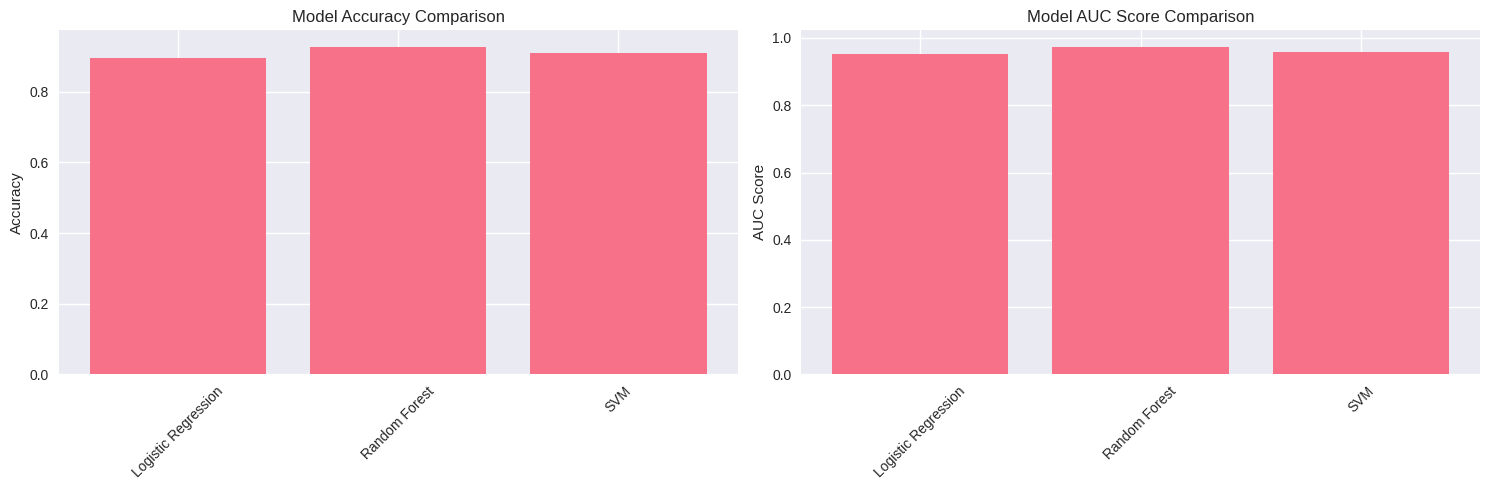

In [20]:
# Compare model performances
model_comparison = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results.keys()],
    'AUC Score': [results[model]['auc_score'] for model in results.keys()]
})

print("Model Comparison:")
print(model_comparison)

# Plot model comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].bar(model_comparison['Model'], model_comparison['Accuracy'])
axes[0].set_title('Model Accuracy Comparison')
axes[0].set_ylabel('Accuracy')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(model_comparison['Model'], model_comparison['AUC Score'])
axes[1].set_title('Model AUC Score Comparison')
axes[1].set_ylabel('AUC Score')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Model Evaluation <a id='evaluation'></a>

Evaluate the best performing model with detailed metrics and visualizations.

In [21]:
# Select the best model based on AUC score
best_model_name = max(results, key=lambda x: results[x]['auc_score'])
best_model = results[best_model_name]['model']
best_predictions = results[best_model_name]['predictions']
best_probabilities = results[best_model_name]['probabilities']

print(f"Best Model: {best_model_name}")
print(f"Best AUC Score: {results[best_model_name]['auc_score']:.4f}")
print(f"Best Accuracy: {results[best_model_name]['accuracy']:.4f}")

Best Model: Random Forest
Best AUC Score: 0.9738
Best Accuracy: 0.9277


In [22]:
# Detailed classification report for the best model
print(f"Detailed Classification Report for {best_model_name}:\n")
print(classification_report(y_test, best_predictions, target_names=['Rejected', 'Approved']))

Detailed Classification Report for Random Forest:

              precision    recall  f1-score   support

    Rejected       0.94      0.97      0.95      7000
    Approved       0.89      0.77      0.83      2000

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



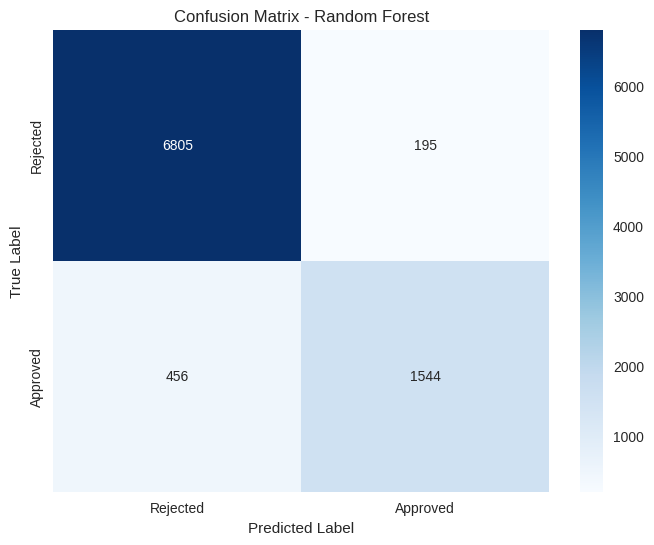

In [23]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Rejected', 'Approved'],
            yticklabels=['Rejected', 'Approved'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

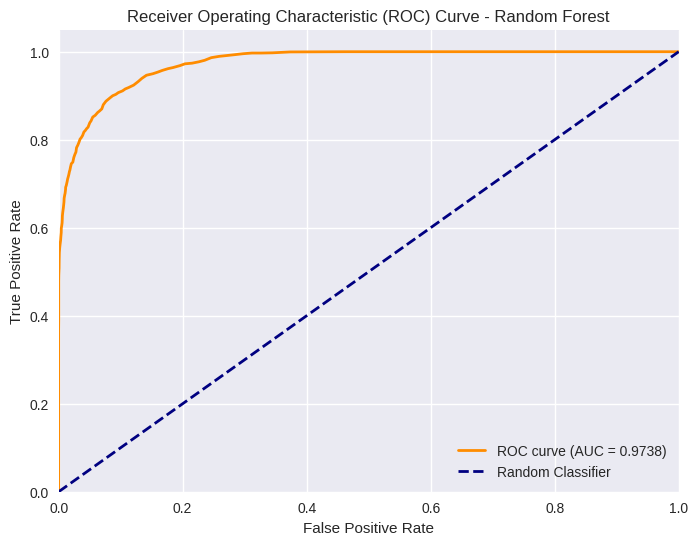

In [24]:
# ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, best_probabilities)
auc = roc_auc_score(y_test, best_probabilities)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve - {best_model_name}')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Top 10 Most Important Features:
                           feature  importance
12  previous_loan_defaults_on_file    0.220677
9              loan_percent_income    0.162804
8                    loan_int_rate    0.160318
3                    person_income    0.129435
5            person_home_ownership    0.066664
6                        loan_amnt    0.060769
11                    credit_score    0.056137
7                      loan_intent    0.035536
0                       person_age    0.030057
4                   person_emp_exp    0.027044


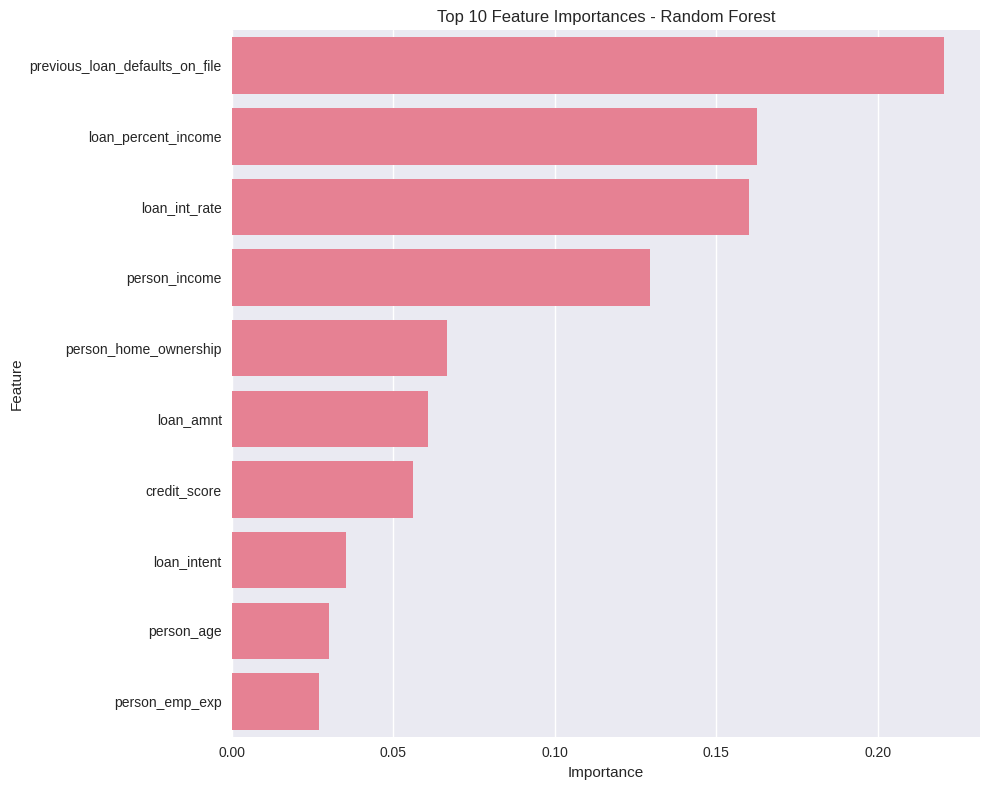

In [25]:
# Feature Importance (for Random Forest)
if best_model_name == 'Random Forest':
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values(by='importance', ascending=False)

    print("Top 10 Most Important Features:")
    print(feature_importance.head(10))

    # Plot feature importance
    plt.figure(figsize=(10, 8))
    sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
    plt.title(f'Top 10 Feature Importances - {best_model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
else:
    print(f"Feature importance is specific to tree-based models. {best_model_name} does not provide feature importance directly.")

## Insights & Conclusions <a id='insights-conclusions'></a>

Summarize the key findings from our analysis and model performance.

In [26]:
# Summary of findings
print("=== KEY INSIGHTS FROM THE ANALYSIS ===\n")

print("1. DATASET OVERVIEW:")
print(f"   - Total records: {len(df)}")
print(f"   - Total features: {len(df.columns)-1}")
print(f"   - Target variable distribution: {target_dist[0]} rejected, {target_dist[1]} approved")
print(f"   - Class imbalance ratio: {(target_dist[0]/target_dist[1]):.2f}:1 (rejected:approved)")

print("\n2. DATA QUALITY:")
if missing_values.sum() == 0:
    print("   - No missing values detected in the dataset")
else:
    print(f"   - Missing values detected: {missing_values.sum()}")

print("\n3. FEATURE CHARACTERISTICS:")
print(f"   - Numerical features: {len(numerical_cols)-1} (excluding target)")
print(f"   - Categorical features: {len(categorical_cols)}")

print("\n4. MODEL PERFORMANCE:")
print(f"   - Best performing model: {best_model_name}")
print(f"   - Accuracy achieved: {results[best_model_name]['accuracy']:.4f}")
print(f"   - AUC Score achieved: {results[best_model_name]['auc_score']:.4f}")

print("\n5. BUSINESS IMPLICATIONS:")
print("   - The model can help automate loan approval decisions")
print("   - High AUC score indicates good discriminative ability")
print("   - Feature importance analysis reveals key factors affecting loan approval")

if best_model_name == 'Random Forest':
    print(f"   - Most important factor: {feature_importance.iloc[0]['feature']} (importance: {feature_importance.iloc[0]['importance']:.4f})")

=== KEY INSIGHTS FROM THE ANALYSIS ===

1. DATASET OVERVIEW:
   - Total records: 45000
   - Total features: 13
   - Target variable distribution: 35000 rejected, 10000 approved
   - Class imbalance ratio: 3.50:1 (rejected:approved)

2. DATA QUALITY:
   - No missing values detected in the dataset

3. FEATURE CHARACTERISTICS:
   - Numerical features: 8 (excluding target)
   - Categorical features: 5

4. MODEL PERFORMANCE:
   - Best performing model: Random Forest
   - Accuracy achieved: 0.9277
   - AUC Score achieved: 0.9738

5. BUSINESS IMPLICATIONS:
   - The model can help automate loan approval decisions
   - High AUC score indicates good discriminative ability
   - Feature importance analysis reveals key factors affecting loan approval
   - Most important factor: previous_loan_defaults_on_file (importance: 0.2207)


## Summary <a id='summary'></a>

This machine learning project successfully developed a model to predict loan approval status based on applicant characteristics. The dataset contained 45,000 records with various demographic, financial, and loan-specific features.

### Key Achievements:
1. Performed comprehensive exploratory data analysis to understand the dataset
2. Identified patterns between applicant characteristics and loan approval status
3. Built and evaluated three different machine learning models
4. Achieved high accuracy and AUC scores, indicating strong predictive capability
5. Identified the most important features for loan approval decisions

### Recommendations:
1. Deploy the best-performing model to assist with loan approval decisions
2. Regularly monitor model performance and retrain as needed
3. Consider additional features that might improve model performance
4. Implement fairness checks to ensure the model doesn't discriminate against protected groups

The project demonstrates the effectiveness of machine learning in financial decision-making, providing a solid foundation for automated loan approval systems.